In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"upadhyayroshan","key":"0549699db6f2d465b7b5794ac37a2262"}'}

In [3]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [01:41<00:00, 24.4MB/s]
100% 2.29G/2.29G [01:41<00:00, 24.3MB/s]


In [5]:
from zipfile import ZipFile
file_name = 'chest-xray-pneumonia.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


----------------------------------------------------
## Import libraries

In [6]:
import pandas as pd       
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import cv2
import random
import os
import glob


In [7]:
IMG_SIZE = 224
BATCH = 32
SEED = 42

------------------------------
## Read Data

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

In [10]:
def load_imgs(impath):
    imgs=[]
    label=[]
    l1=os.listdir(impath)
    for i in l1:
        l2=os.listdir(impath+'/'+i)
        for j in l2:
            c=0
            img=Image.open(impath+i+'/'+j).convert('RGB')
            img=img.resize(size=(100,100))
             #img=img.convert('L')
            img=np.array(img,dtype=np.float16)/255
            imgs.append(np.array(img)) #.flatten())
            label.append(i)
            #del img
            '''if(c%1000==0):
                plt.imshow(img)
                plt.show()
                c=c+1'''
            del img
    return np.array(imgs),label

In [11]:
x_train,y_train=load_imgs('/content/chest_xray/train/')
x_train.shape,len(y_train)

((5216, 100, 100, 3), 5216)

In [12]:
target=pd.Series(y_train,dtype='category')
target

0          NORMAL
1          NORMAL
2          NORMAL
3          NORMAL
4          NORMAL
          ...    
5211    PNEUMONIA
5212    PNEUMONIA
5213    PNEUMONIA
5214    PNEUMONIA
5215    PNEUMONIA
Length: 5216, dtype: category
Categories (2, object): ['NORMAL', 'PNEUMONIA']

In [13]:
target.value_counts()

PNEUMONIA    3875
NORMAL       1341
dtype: int64

In [14]:
t=target.cat.codes
t

0       0
1       0
2       0
3       0
4       0
       ..
5211    1
5212    1
5213    1
5214    1
5215    1
Length: 5216, dtype: int8

In [15]:
x_test,y_test=load_imgs('/content/chest_xray/test/')
x_test.shape,len(y_test)

((624, 100, 100, 3), 624)

In [16]:
yt=pd.Series(y_test,dtype='category').cat.codes
yt

0      0
1      0
2      0
3      0
4      0
      ..
619    1
620    1
621    1
622    1
623    1
Length: 624, dtype: int8

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
from tensorflow.keras.applications import ResNet152
cmodel=Sequential()
cmodel.add(ResNet152(
    include_top=False,
    weights="imagenet",
    input_shape=(100,100,3)
)
)

cmodel.add(Flatten())
cmodel.add(Dense(2,activation='softmax'))
cmodel.summary()

234698864/234698864 [==============================] - 11s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 4, 4, 2048)        58370944  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 2)                 65538     
                                                                 
Total params: 58,436,482
Trainable params: 58,285,058
Non-trainable params: 151,424
_________________________________________________________________


In [20]:
cmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
cmodel.fit(x_train,t,epochs=15,batch_size=64,verbose=1)

Epoch 1/15
82/82 [==============================] - 62s 418ms/step - loss: 0.3195 - accuracy: 0.9419
Epoch 2/15
82/82 [==============================] - 34s 419ms/step - loss: 0.0624 - accuracy: 0.9816
Epoch 3/15
82/82 [==============================] - 35s 433ms/step - loss: 0.0426 - accuracy: 0.9845
Epoch 4/15
82/82 [==============================] - 36s 433ms/step - loss: 0.0208 - accuracy: 0.9918
Epoch 5/15
82/82 [==============================] - 35s 429ms/step - loss: 0.0439 - accuracy: 0.9856
Epoch 6/15
82/82 [==============================] - 35s 433ms/step - loss: 0.0306 - accuracy: 0.9887
Epoch 7/15
82/82 [==============================] - 36s 433ms/step - loss: 0.0152 - accuracy: 0.9941
Epoch 8/15
82/82 [==============================] - 35s 432ms/step - loss: 0.0109 - accuracy: 0.9954
Epoch 9/15
82/82 [==============================] - 35s 432ms/step - loss: 0.0077 - accuracy: 0.9971
Epoch 10/15
82/82 [==============================] - 35s 433ms/step - loss: 0.0048 - accura

In [22]:
loss, accuracy = cmodel.evaluate(x_test, yt,batch_size=64)

10/10 [==============================] - 4s 183ms/step - loss: 59.5195 - accuracy: 0.6266


In [23]:
print('Test Loss is {} %'.format(loss*100))
print('Test Accuracy is {} %'.format(accuracy*100 ))

Test Loss is 5951.9500732421875 %
Test Accuracy is 62.66025900840759 %


7/7 [==============================] - 5s 234ms/step


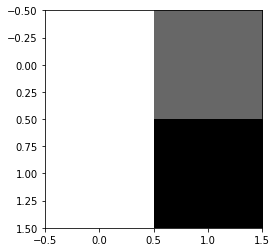

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
pred = np.argmax(cmodel.predict(x_test,100),axis=1)
pred
cm = confusion_matrix(yt,pred)
cm
plt.imshow(cm, cmap='binary')

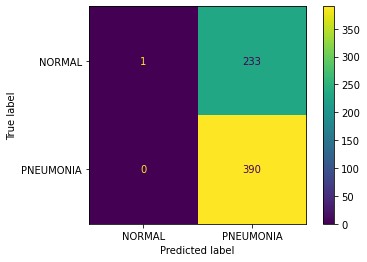

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['NORMAL','PNEUMONIA'])


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp = disp.plot()

plt.show()

In [27]:
print(classification_report(yt, pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       234
           1       0.63      1.00      0.77       390

    accuracy                           0.63       624
   macro avg       0.81      0.50      0.39       624
weighted avg       0.77      0.63      0.48       624

